### Data Visualization using matplotlib
- Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City
- Dataset: "City_Air_Quality.csv"
- Description: The dataset contains information about air quality measurements in a specific
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g.,
PM2.5, PM10, CO), and the Air Quality Index (AQI) values. 
- The goal is to use the matplotlib
library to create visualizations that effectively represent the AQI trends and patterns for
different pollutants in the city.
#### Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant
levels, and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

### Exam specific
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant
levels, and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Air_Quality.csv')
df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0


In [3]:
df.shape

(1836, 10)

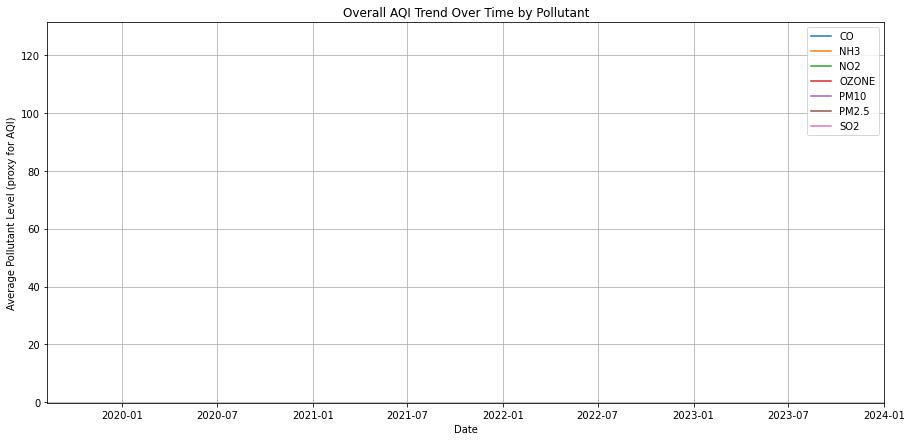

In [7]:
import matplotlib.pyplot as plt

# Convert 'last_update' to datetime
df['last_update'] = pd.to_datetime(df['last_update'])

# Assuming 'pollutant_avg' as a proxy for AQI for each pollutant
# We will create a line plot for the AQI trends over time for each pollutant

# Grouping the data by date and pollutant_id to get daily averages
daily_aqi = df.groupby([df['last_update'].dt.date, 'pollutant_id'])['pollutant_avg'].mean().unstack()

# Plotting the overall AQI trend over time for each pollutant
plt.figure(figsize=(15, 7))
for pollutant in daily_aqi.columns:
    plt.plot(daily_aqi.index, daily_aqi[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Average Pollutant Level (proxy for AQI)')
plt.title('Overall AQI Trend Over Time by Pollutant')
plt.legend()
plt.grid(True)
plt.show()


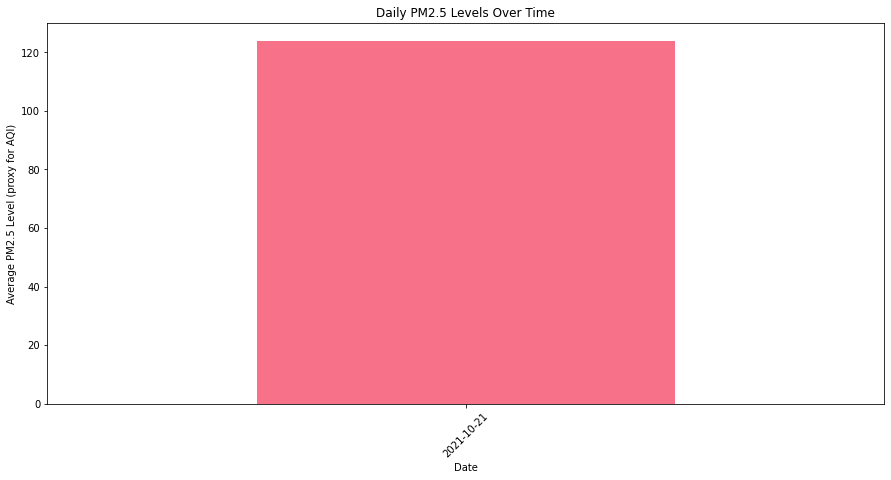

In [8]:
import seaborn as sns

# Setting up the color palette
sns.set_palette("husl")

# Task 6: Use bar plots to compare the AQI values across different dates for one pollutant as an example
# For demonstration, let's choose PM2.5
pm25_daily_aqi = daily_aqi['PM2.5'].dropna()
plt.figure(figsize=(15, 7))
pm25_daily_aqi.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 Level (proxy for AQI)')
plt.title('Daily PM2.5 Levels Over Time')
plt.xticks(rotation=45)
plt.show()


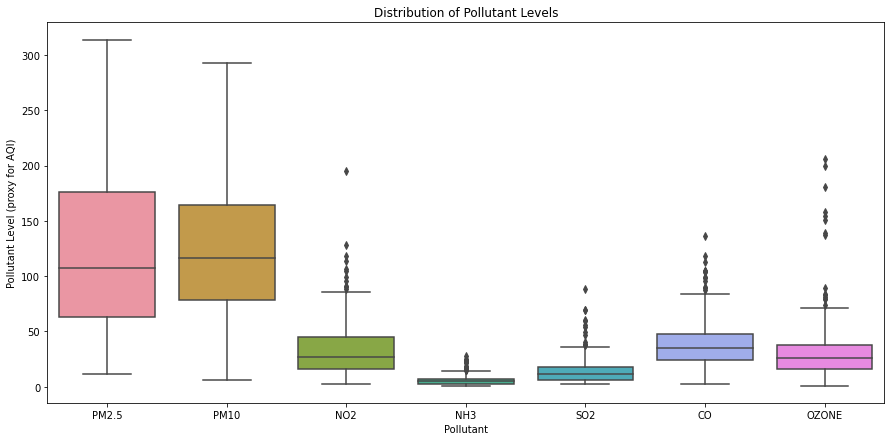

In [10]:

# Task 7: Create box plots to analyze the distribution of AQI values for different pollutants
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='pollutant_id', y='pollutant_avg')
plt.xlabel('Pollutant')
plt.ylabel('Pollutant Level (proxy for AQI)')
plt.title('Distribution of Pollutant Levels')
plt.show()


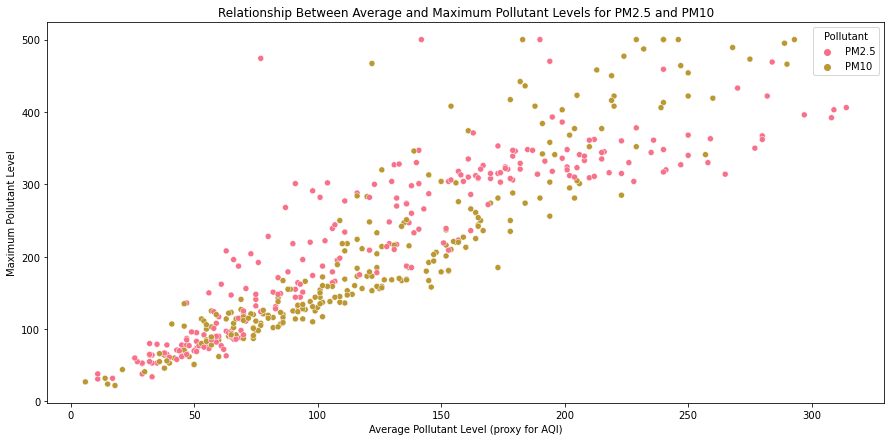

In [11]:
# Task 8: Use scatter plots to explore the relationship between AQI values and pollutant levels
# For this example, let's compare PM2.5 and PM10
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df[df['pollutant_id'].isin(['PM2.5', 'PM10'])],
                x='pollutant_avg', y='pollutant_max', hue='pollutant_id')
plt.xlabel('Average Pollutant Level (proxy for AQI)')
plt.ylabel('Maximum Pollutant Level')
plt.title('Relationship Between Average and Maximum Pollutant Levels for PM2.5 and PM10')
plt.legend(title='Pollutant')
plt.show()